In [111]:
import numpy as np
import os
import PIL
import matplotlib.pyplot as plt
from collections import Counter
import pandas as pd
from skimage import segmentation
from sklearn.metrics import accuracy_score, roc_auc_score

In [112]:
path_train = "../Data/dataset_DRIVE/training/images/"
training_images = os.listdir(path_train)
train_images = {}
for i in sorted(training_images):
    number = i[0:2]
    img = np.array(PIL.Image.open(f'{path_train}{i}').convert("RGB"))
    train_images[str(number)] =  img

In [113]:
path_labels = "../Data/dataset_DRIVE/training/1st_manual/"
training_labels = os.listdir(path_labels)
labels = {}
for image in training_labels:
    img = np.array(PIL.Image.open(f'{path_labels}{image}').convert("L"), dtype=np.float32)
    labels[image[0:2]] = img

In [114]:
path_maks = "../Data/dataset_DRIVE/training/mask/"
training_masks = os.listdir(path_maks)
masks = {}
for image in training_masks:
    img = np.array(PIL.Image.open(f'{path_maks}{image}').convert("RGB"), dtype=np.float32)
    masks[image[0:2]] = img

In [115]:
#Multiplico las imágenes elemento a elemento por sus máscaras
for i in masks.keys():
    train_images[i] = train_images[i] * masks[i]/255

# Kmeans

In [116]:
from sklearn.cluster import KMeans, DBSCAN

In [166]:
image = train_images['21'].reshape(-1,3)
image2 = train_images['22'].reshape(-1,3)
image3 = train_images['23'].reshape(-1,3)

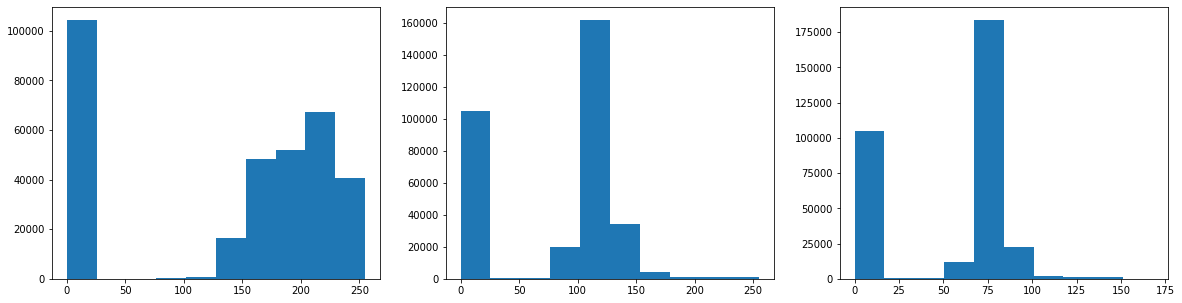

In [118]:
plt.rcParams["figure.figsize"] = (20,5)

fig, (ax0, ax1, ax2) = plt.subplots(1, 3)

ax0.hist(image[:,0]);
ax1.hist(image[:,1]);
ax2.hist(image[:,2]);

In [167]:
df = pd.DataFrame(data=image, columns = ["R", "G", "B"])
df2 = pd.DataFrame(data=image2, columns = ["R", "G", "B"])
df3 = pd.DataFrame(data=image3, columns = ["R", "G", "B"])

In [149]:
non_retine = df[(df.R==0) & (df.G==0) & (df.B ==0)]
retine = df[~df.index.isin(list(non_retine.index))]

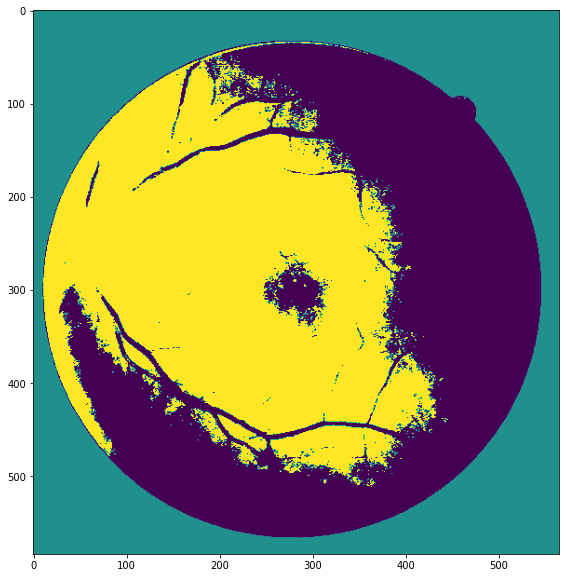

In [150]:
#3 Clusters sobre la imagen completa
km = KMeans(n_clusters=3)
preds = km.fit_predict(df)
plt.imshow(preds.reshape(584, 565))

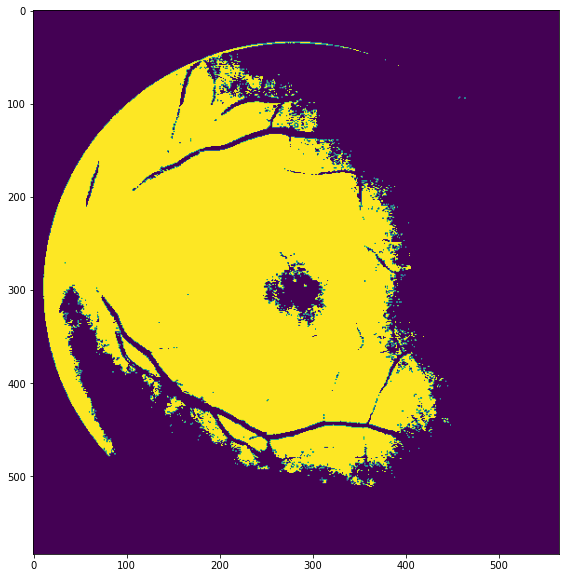

In [151]:
plt.rcParams["figure.figsize"] = (10,10)
# 2 clusters sobre la retina
km = KMeans(n_clusters=2)

preds = km.fit_predict(retine)
retine.insert(loc=retine.shape[1],column='Clustering_result', value=preds)
non_retine.insert(loc=non_retine.shape[1],column='Clustering_result', value=0)
image = pd.concat([retine,non_retine])
image = image.sort_index()
plt.imshow(np.array(image.Clustering_result).reshape(584, 565))

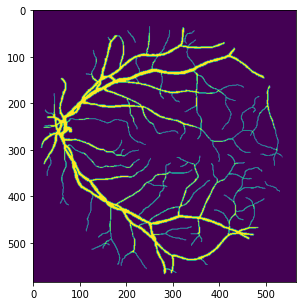

In [128]:
plt.imshow(labels['21'])

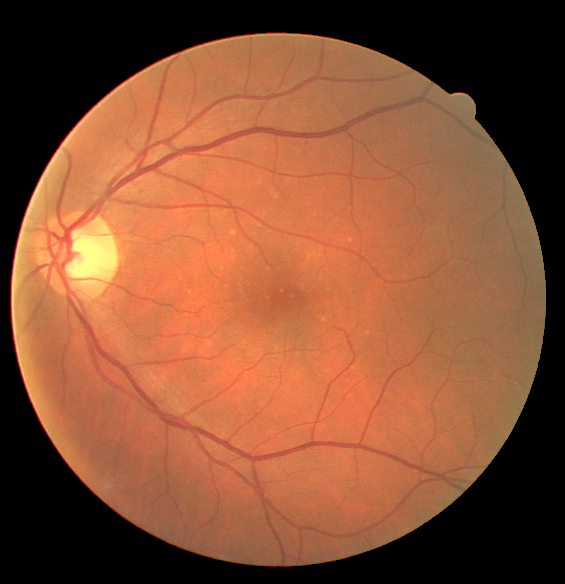

In [129]:
PIL.Image.fromarray(np.uint8(train_images['21'])).convert('RGB')

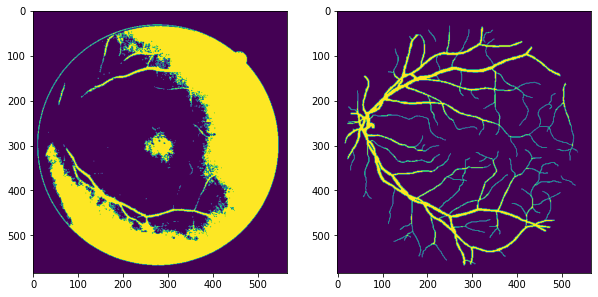

In [130]:
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax0, ax1) = plt.subplots(1, 2)

ax0.imshow(np.array(image.Clustering_result).reshape(584, 565));
ax1.imshow(labels['21']);

## Clustering sobre un solo canal

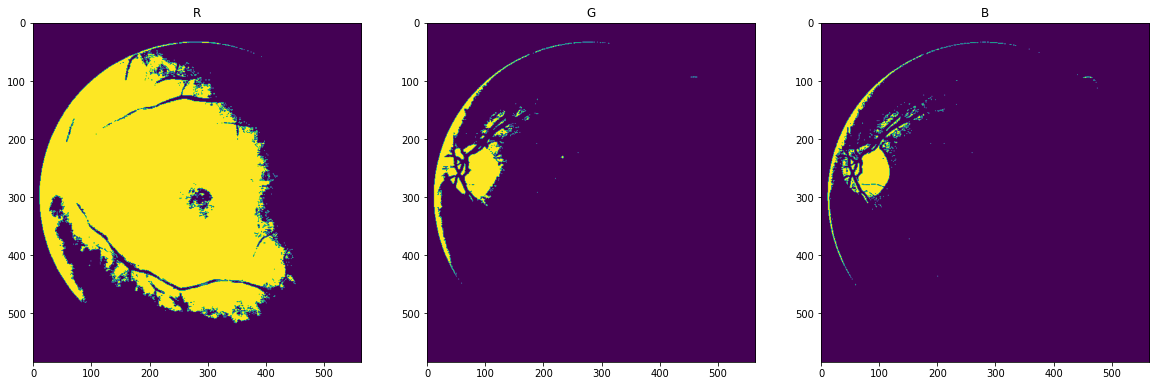

In [154]:
plt.rcParams["figure.figsize"] = (20,20)
channel = ["R","G","B"]
fig, (ax0, ax1, ax2) = plt.subplots(1, 3)
for j,i in enumerate(channel):
    km = KMeans(n_clusters=2)
    non_retine = df[(df.R==0) & (df.G==0) & (df.B ==0)]
    retine = df[~df.index.isin(list(non_retine.index))]
    km.fit(retine.loc[:,i].to_numpy().reshape(-1,1))
    preds = km.predict(retine.loc[:,i].to_numpy().reshape(-1,1))
    retine.insert(loc=retine.shape[1],column='Clustering_result', value=preds)
    non_retine.insert(loc=non_retine.shape[1],column='Clustering_result', value=0)
    image = pd.concat([retine,non_retine])
    image = image.sort_index()
    eval(f'ax{j}').imshow(np.array(image.Clustering_result).reshape(584, 565))
    eval(f'ax{j}').title.set_text(i)

# DBscan

2 Clusters


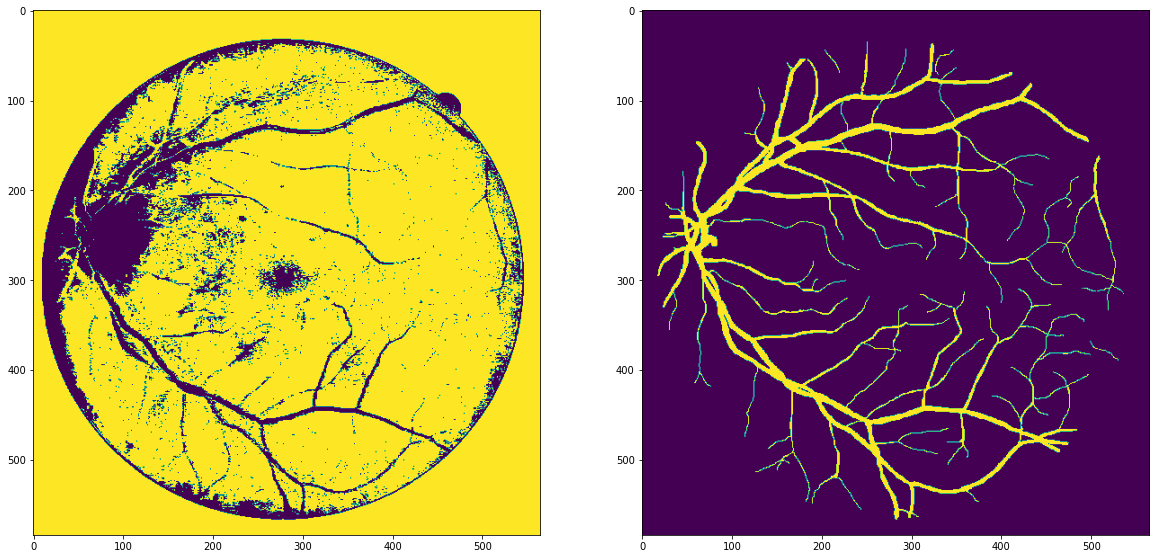

In [168]:
plt.rcParams["figure.figsize"] = (20,10)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['21']);
db = DBSCAN(eps=3, min_samples=500)
non_retine = df[(df.R==0) & (df.G==0) & (df.B ==0)]
retine = df[~df.index.isin(list(non_retine.index))]
db.fit(retine.loc[:,["R","G", "B"]].to_numpy())
preds = db.labels_
retine.insert(loc=retine.shape[1],column='Clustering_result', value=preds)
non_retine.insert(loc=non_retine.shape[1],column='Clustering_result', value=0)
image = pd.concat([retine,non_retine])
image = image.sort_index()
ax0.imshow(np.array(image.Clustering_result).reshape(584, 565))
print(f'{len(np.unique(preds))} Clusters')

2 Clusters


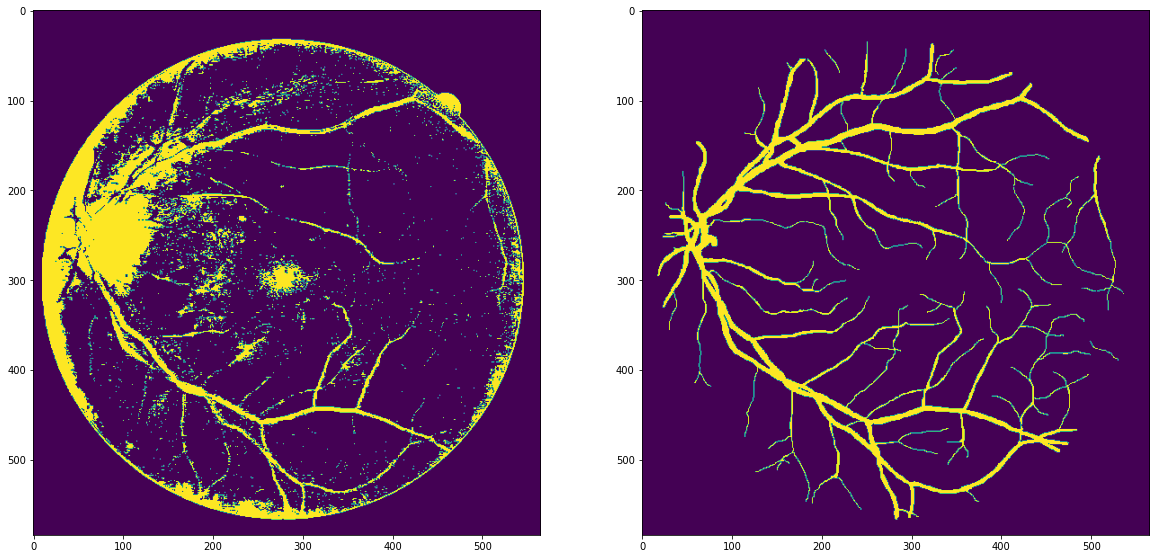

In [169]:
inverted = np.array(image.Clustering_result).reshape(584, 565)*-1
plt.rcParams["figure.figsize"] = (20,10)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['21']);
ax0.imshow(inverted)
print(f'{len(np.unique(preds))} Clusters')

In [170]:
print(f' ACC: {accuracy_score(labels["21"].reshape(-1),inverted.reshape(-1))}')
print(f' AUC: {roc_auc_score(labels["21"].reshape(-1),inverted.reshape(-1))}')

 ACC: 0.8257122075403079
 AUC: 0.7057920187218873


2 Clusters


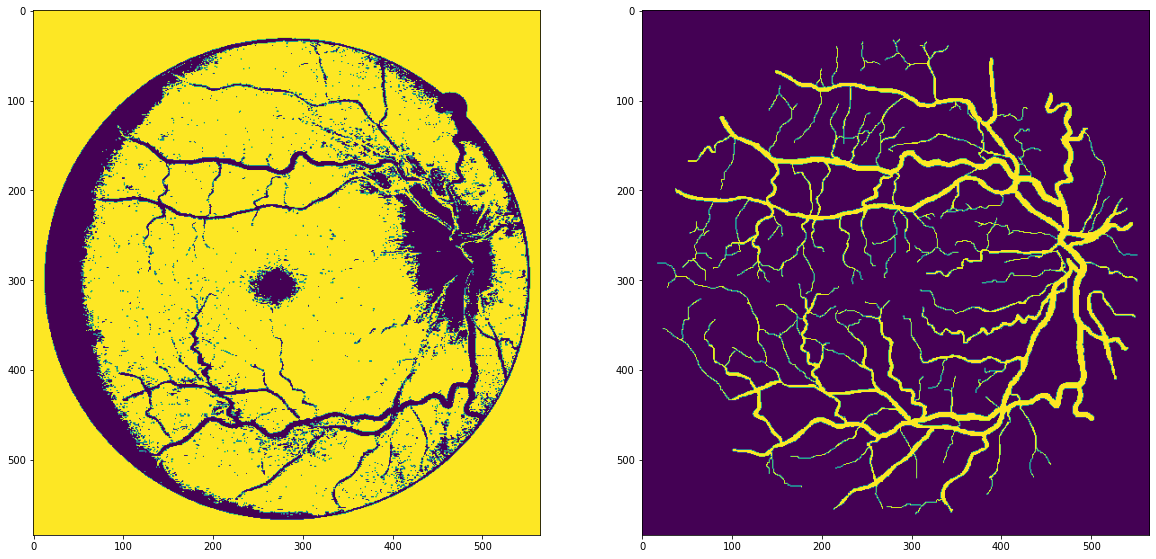

In [171]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['22']);
db = DBSCAN(eps=3, min_samples=500)
non_retine = df2[(df2.R==0) & (df2.G==0) & (df2.B ==0)]
retine = df2[~df2.index.isin(list(non_retine.index))]
db.fit(retine.loc[:,["R","G", "B"]].to_numpy())
preds = db.labels_
retine.insert(loc=retine.shape[1],column='Clustering_result', value=preds)
non_retine.insert(loc=non_retine.shape[1],column='Clustering_result', value=0)
image = pd.concat([retine,non_retine])
image = image.sort_index()
ax0.imshow(np.array(image.Clustering_result).reshape(584, 565))
print(f'{len(np.unique(preds))} Clusters')

2 Clusters


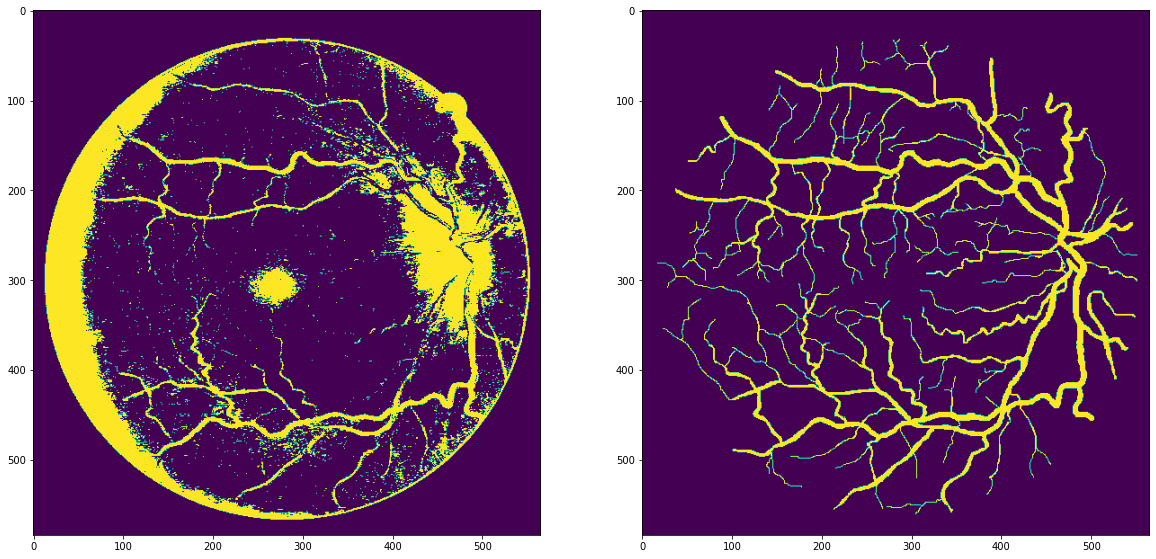

In [172]:
inverted = np.array(image.Clustering_result).reshape(584, 565)*-1
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['22']);
ax0.imshow(inverted)
print(f'{len(np.unique(preds))} Clusters')

In [174]:
print(f' ACC: {accuracy_score(labels["22"].reshape(-1),inverted.reshape(-1))}')
print(f' AUC: {roc_auc_score(labels["22"].reshape(-1),inverted.reshape(-1))}')

 ACC: 0.780170323675597
 AUC: 0.7002035961489663


4 Clusters


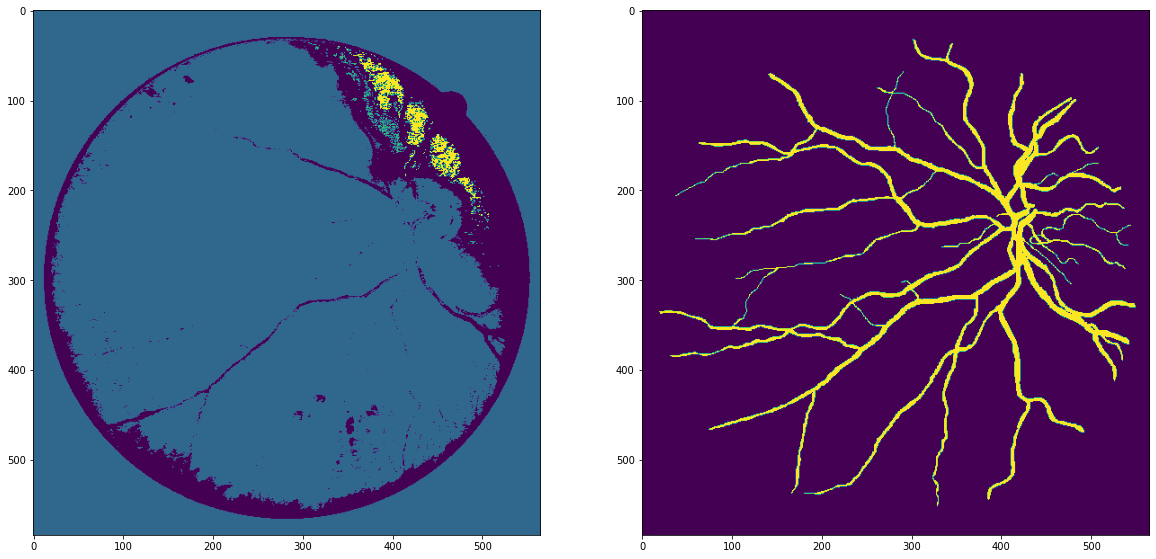

In [175]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['23']);
db = DBSCAN(eps=3, min_samples=500)
non_retine = df3[(df3.R==0) & (df3.G==0) & (df3.B ==0)]
retine = df3[~df3.index.isin(list(non_retine.index))]
db.fit(retine.loc[:,["R","G", "B"]].to_numpy())
preds = db.labels_
retine.insert(loc=retine.shape[1],column='Clustering_result', value=preds)
non_retine.insert(loc=non_retine.shape[1],column='Clustering_result', value=0)
image = pd.concat([retine,non_retine])
image = image.sort_index()
ax0.imshow(np.array(image.Clustering_result).reshape(584, 565))
print(f'{len(np.unique(preds))} Clusters')

4 Clusters


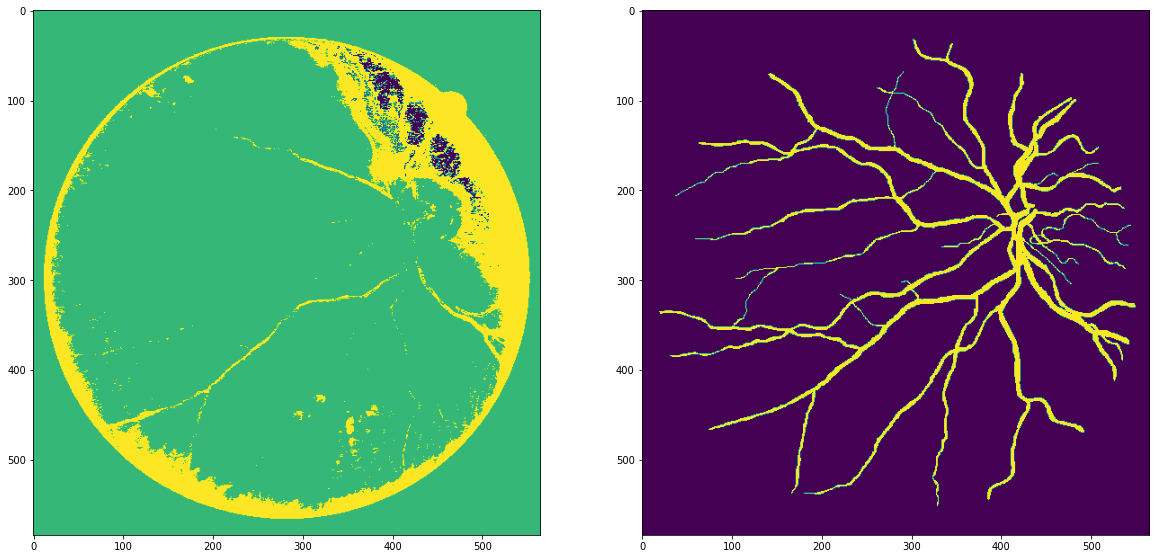

In [176]:
inverted = np.array(image.Clustering_result).reshape(584, 565)*-1
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['23']);
ax0.imshow(inverted)
print(f'{len(np.unique(preds))} Clusters')

In [ ]:
print(f' ACC: {accuracy_score(labels["23"].reshape(-1),inverted.reshape(-1))}')
print(f' AUC: {roc_auc_score(labels["23"].reshape(-1),inverted.reshape(-1))}')

## Quickshift

Number of segments: 4


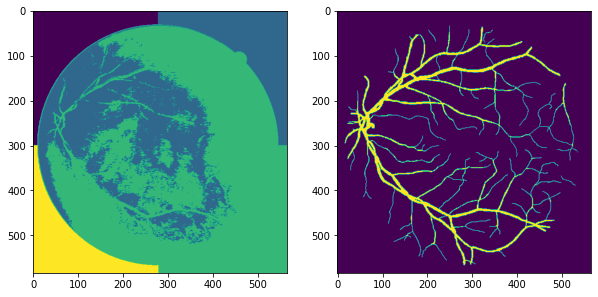

In [26]:
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['21']);
fe = segmentation.quickshift(df.to_numpy().reshape(584,565,3), max_dist=1e24, kernel_size=49)
ax0.imshow(fe)
print("Number of segments: {}".format(len(np.unique(fe))))

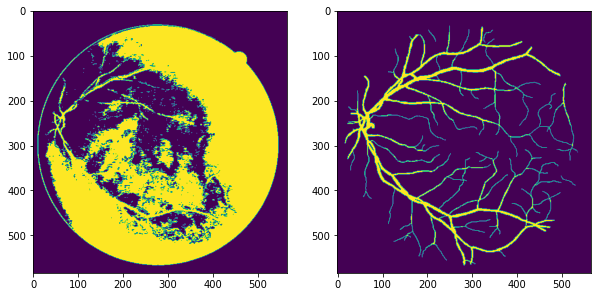

In [27]:
img =  fe * masks['21'][:,:,0]/255
img = img - 1
img[img<0] = 0
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['21']);
ax0.imshow(img)

### Thresholding

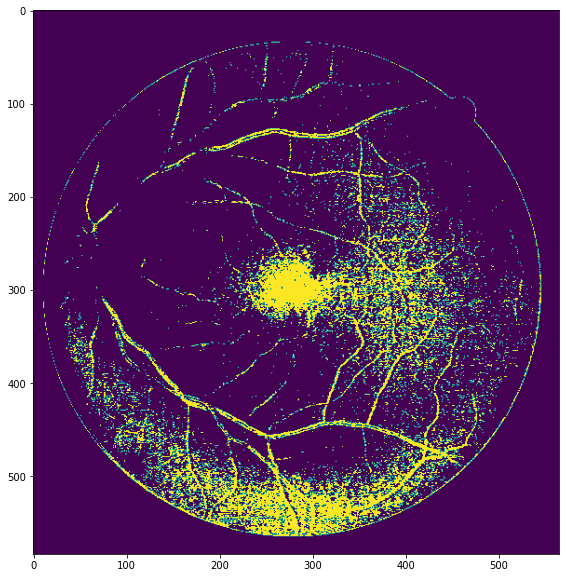

In [42]:
plt.imshow(((df.B > 40) & (df.B < 71)).to_numpy().reshape(584, 565))

In [43]:
print(f' ACC: {accuracy_score(labels["21"].reshape(-1),((df.B > 40) & (df.B < 71)).to_numpy())}')
print(f' AUC: {roc_auc_score(labels["21"].reshape(-1),((df.B > 40) & (df.B < 71)).to_numpy())}')

 ACC: 0.8442265729179295
 AUC: 0.6378302835274917


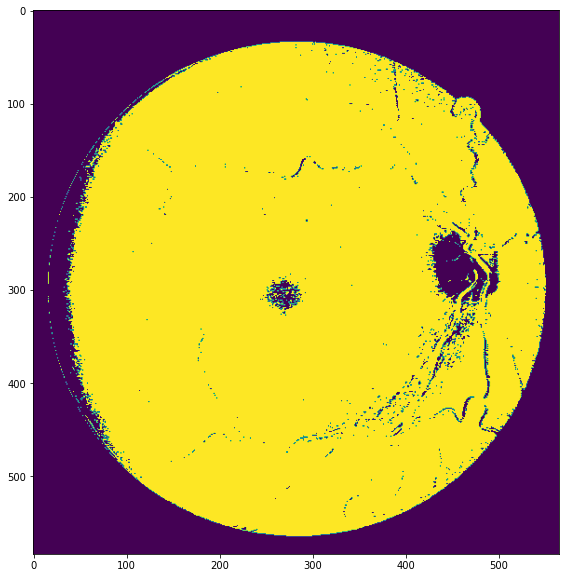

In [81]:
plt.imshow(((df2.B > 40) & (df2.B < 71)).to_numpy().reshape(584, 565))

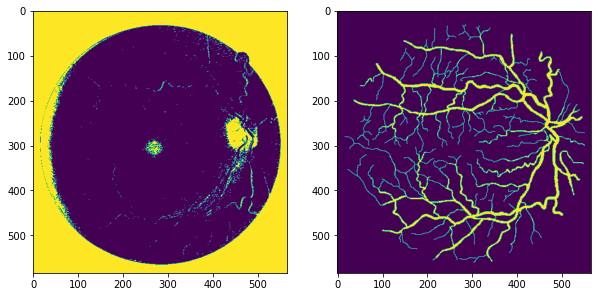

In [79]:
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['22']);
ax0.imshow(((df2.B > 40) & (df2.B < 71)).to_numpy().reshape(584, 565)*-1)

### RandomForest

In [177]:
from sklearn.ensemble import RandomForestClassifier

In [178]:
model = RandomForestClassifier()

In [181]:
train_images.keys()

dict_keys(['21', '22', '23', '24', '27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '39', '40'])

In [183]:
one_of = ['21', '22', '23', '24', '27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '39', '40']

In [188]:
np.random.seed(1)
sample = np.random.choice(one_of, 10).astype('str')
X = []
y = []
for i in sample:
    X.append(train_images[i].reshape(-1,3))
    y.append(labels[i].reshape(-1))

In [189]:
X = pd.DataFrame(np.concatenate(X))
y = pd.DataFrame(np.concatenate(y))

In [190]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
sc.fit(X)

StandardScaler(copy=True, with_mean=True, with_std=True)

In [191]:
x = sc.transform(X)

In [192]:
model.fit(x, y)

/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """Entry point for launching an IPython kernel.


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [193]:
X_test = train_images['21'].reshape(-1,3)
y_test = labels['21'].reshape(-1)

In [194]:
x_test = sc.transform(X_test)

In [195]:
preds = model.predict(x_test)

In [196]:
#On test
print(f' ACC: {accuracy_score(y_test, preds)}')
print(f' AUC: {roc_auc_score(y_test, preds)}')

 ACC: 0.9515153351921445
 AUC: 0.7109057776043716


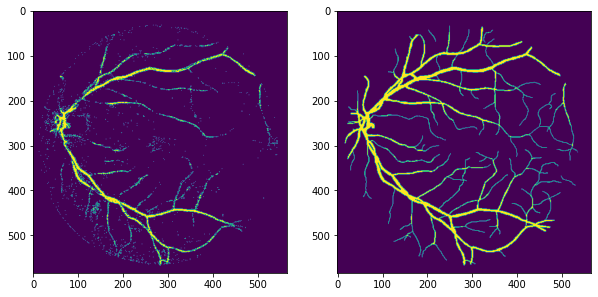

In [197]:
plt.rcParams["figure.figsize"] = (10,10)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels['21']);
ax0.imshow(preds.reshape(584, 565))

In [199]:
len(one_of) # 16 imágenes de train

16

In [204]:
from sklearn.model_selection import KFold

In [206]:
kf = KFold(n_splits=4, shuffle=True, random_state=0)

# Training a 4 fold random_forest

In [229]:
accs = []
aucs = []
sc = StandardScaler()
rf = RandomForestClassifier(class_weight="balanced")

for train_index, test_index in kf.split(one_of):
    X_train = []
    y_train = []
    X_test = []
    y_test = []
    for i in train_index:
        X_train.append(train_images[one_of[i]].reshape(-1,3))
        y_train.append(labels[one_of[i]].reshape(-1))
    for i in test_index:
        X_test.append(train_images[one_of[i]].reshape(-1,3))
        y_test.append(labels[one_of[i]].reshape(-1))

    X_train = pd.DataFrame(np.concatenate(X_train))
    y_train = pd.DataFrame(np.concatenate(y_train))
    X_test = pd.DataFrame(np.concatenate(X_test))
    y_test = pd.DataFrame(np.concatenate(y_test))

    x_train = sc.fit_transform(X_train)
    rf.fit(x_train, y_train)
    x_test = sc.transform(X_test)
    preds = rf.predict(x_test)
    accs.append(accuracy_score(y_test, preds))
    aucs.append(roc_auc_score(y_test, preds))


/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [230]:
print(accs)
print(aucs)
print(np.mean(accs))
print(np.mean(aucs))

[0.6420558552551825, 0.6032481209843618, 0.7685166383804097, 0.7932241786883258]
[0.6596358401280704, 0.6699686956513486, 0.5707621861614327, 0.6640018859035274]
0.70176119832707
0.6410921519610948


# How the model is working in each image (comparison with others)

In [231]:
rest = ['27', '28', '29', '30', '31', '32', '33', '34', '36', '37', '39', '40']

In [232]:
X = []
y = []
for i in rest:
    X.append(train_images[i].reshape(-1,3))
    y.append(labels[i].reshape(-1))

X = pd.DataFrame(np.concatenate(X))
y = pd.DataFrame(np.concatenate(y))

x = sc.fit_transform(X)
rf.fit(x, y)

/Users/alberto/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:11: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  # This is added back by InteractiveShellApp.init_path()


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

Text(0.5, 1.0, 'AUC : 0.68')

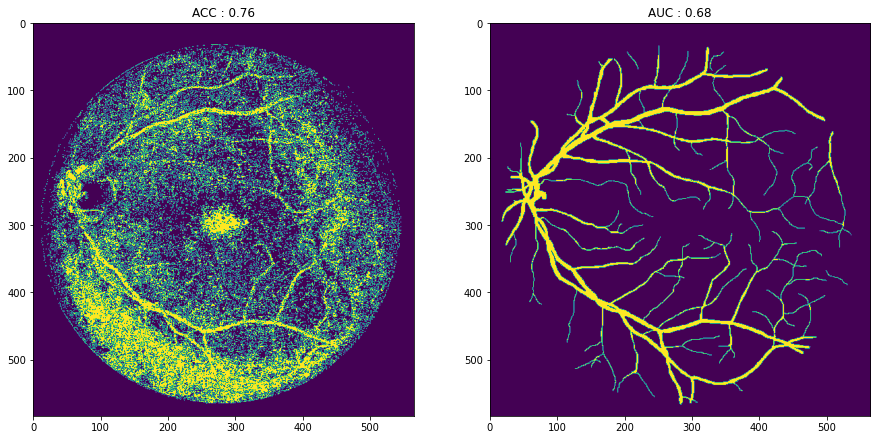

In [233]:
image_no = '21'
plt.rcParams["figure.figsize"] = (15,15)
X_test = train_images[image_no].reshape(-1,3)
y_test = labels[image_no].reshape(-1)
x_test = sc.transform(X_test)
preds = rf.predict(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels[image_no]);
ax0.imshow(preds.reshape(584, 565))
ax0.set_title(f"ACC : {np.round(accuracy_score(y_test, preds), 2)}")
ax1.set_title(f"AUC : {np.round(roc_auc_score(y_test, preds), 2)}")

Text(0.5, 1.0, 'AUC : 0.69')

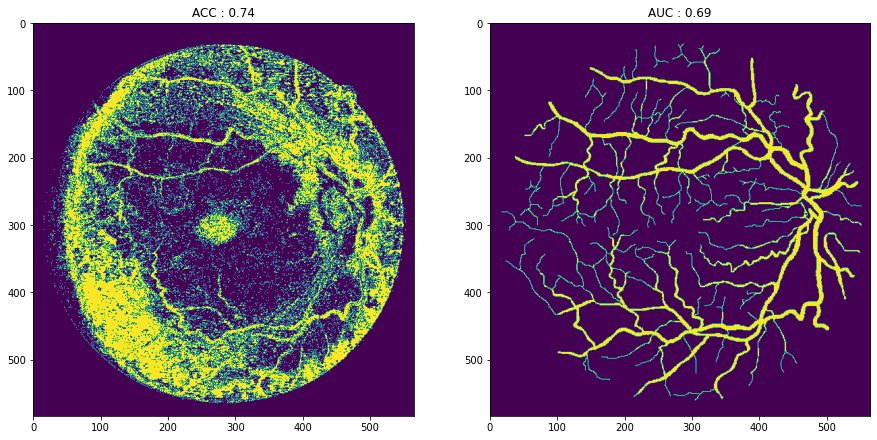

In [234]:
image_no = '22'
X_test = train_images[image_no].reshape(-1,3)
y_test = labels[image_no].reshape(-1)
x_test = sc.transform(X_test)
preds = rf.predict(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels[image_no]);
ax0.imshow(preds.reshape(584, 565))
ax0.set_title(f"ACC : {np.round(accuracy_score(y_test, preds), 2)}")
ax1.set_title(f"AUC : {np.round(roc_auc_score(y_test, preds), 2)}")

Text(0.5, 1.0, 'AUC : 0.7')

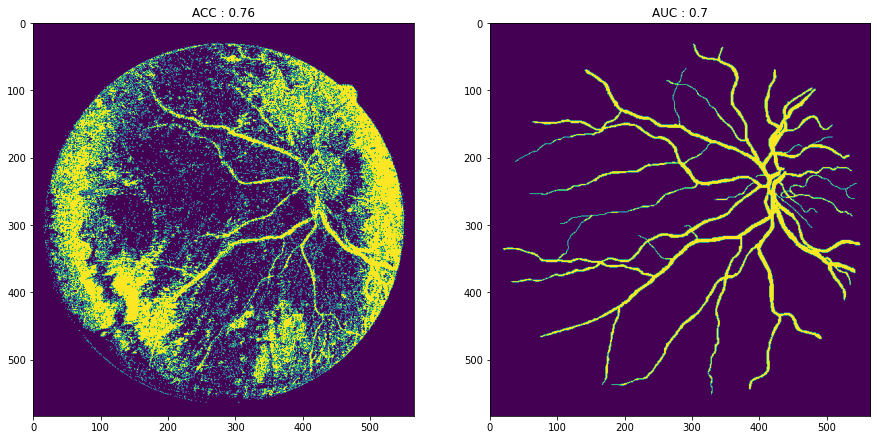

In [235]:
image_no = '23'
X_test = train_images[image_no].reshape(-1,3)
y_test = labels[image_no].reshape(-1)
x_test = sc.transform(X_test)
preds = rf.predict(x_test)
fig, (ax0, ax1) = plt.subplots(1, 2)
ax1.imshow(labels[image_no]);
ax0.imshow(preds.reshape(584, 565))
ax0.set_title(f"ACC : {np.round(accuracy_score(y_test, preds), 2)}")
ax1.set_title(f"AUC : {np.round(roc_auc_score(y_test, preds), 2)}")